In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


from keras.layers import Dense, LSTM, Flatten

print(tf.__version__)

2.3.0


In [128]:
# Semilla de aleatoriedad del experimento.
tf.random.set_seed(7)

In [129]:
# Carga del dataset.
dataframe = pd.read_csv('tasa_empleo_1975.csv', sep=";", usecols=[1], engine='python')
dataset = dataframe.values
values = dataset.astype('float32')

In [130]:
PASOS=6

# ajuste de la serie para formato de LSTM
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [131]:
# formato LSTM
reframed = series_to_supervised(values, PASOS, 1)
reframed.head()

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
6,50.150002,49.650002,49.290001,48.970001,48.849998,48.730000,48.139999
7,49.650002,49.290001,48.970001,48.849998,48.730000,48.139999,47.680000
8,49.290001,48.970001,48.849998,48.730000,48.139999,47.680000,47.520000
9,48.970001,48.849998,48.730000,48.139999,47.680000,47.520000,47.119999
10,48.849998,48.730000,48.139999,47.680000,47.520000,47.119999,46.820000


In [132]:
# separación en datos de test y entrenamiento del modelo
values = reframed.values
n_train_days = 150 - (7+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# separación en entradas y salidas
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reformulación 3D vectores para LSTM
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(137, 1, 6) (137,) (41, 1, 6) (41,)


In [133]:
# Definición del modelo

def crear_modeloFF():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, PASOS)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    return model

In [134]:
# Definición del número de epochs de entrenamiento del modelo.

EPOCHS=200
 
model = crear_modeloFF()

#Entrenamiento del modelo

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50)                11400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
23/23 [==============================] - 0s 16ms/step - loss: 1812.5874 - val_loss: 1363.1261
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 507.3294 - val_loss: 1.7465
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 14.0715 - val_loss: 2.0347
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 3.2432 - val_loss: 1.7630
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 2.0512 - val_loss: 1.8236
Epoch 6

23/23 [==============================] - 0s 2ms/step - loss: 1.4564 - val_loss: 1.3094
Epoch 77/200
23/23 [==============================] - 0s 2ms/step - loss: 1.4491 - val_loss: 1.4193
Epoch 78/200
23/23 [==============================] - 0s 2ms/step - loss: 1.6716 - val_loss: 1.4445
Epoch 79/200
23/23 [==============================] - 0s 2ms/step - loss: 1.6182 - val_loss: 1.4286
Epoch 80/200
23/23 [==============================] - 0s 2ms/step - loss: 1.4892 - val_loss: 1.7650
Epoch 81/200
23/23 [==============================] - 0s 2ms/step - loss: 1.4783 - val_loss: 1.3215
Epoch 82/200
23/23 [==============================] - 0s 2ms/step - loss: 1.3435 - val_loss: 1.2046
Epoch 83/200
23/23 [==============================] - 0s 2ms/step - loss: 1.5863 - val_loss: 1.3830
Epoch 84/200
23/23 [==============================] - 0s 2ms/step - loss: 1.3960 - val_loss: 1.2971
Epoch 85/200
23/23 [==============================] - 0s 2ms/step - loss: 1.5097 - val_loss: 2.4237
Epoch 86/200


23/23 [==============================] - 0s 2ms/step - loss: 0.2290 - val_loss: 0.7951
Epoch 158/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2494 - val_loss: 0.7258
Epoch 159/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2443 - val_loss: 0.7278
Epoch 160/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2554 - val_loss: 0.8609
Epoch 161/200
23/23 [==============================] - 0s 2ms/step - loss: 0.3352 - val_loss: 0.7009
Epoch 162/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2131 - val_loss: 0.6927
Epoch 163/200
23/23 [==============================] - 0s 2ms/step - loss: 0.1787 - val_loss: 0.7069
Epoch 164/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2652 - val_loss: 0.7935
Epoch 165/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2583 - val_loss: 1.3092
Epoch 166/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5444 - val_loss: 1.2060
Epoc

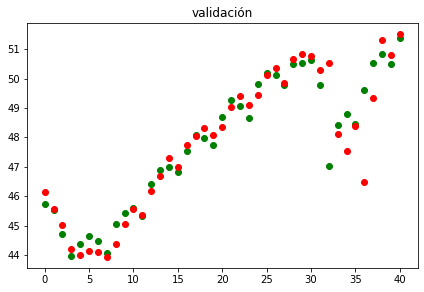

In [148]:
# Comparación de los resultados predichos por el modelo con los resultados reales de la serie.

results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validación')
plt.show()

In [136]:
# Carga de nuevo del dataset.

dataframe_2 = pd.read_csv('tasa_empleo_1975.csv', sep=";", usecols=[1], engine='python')
dataframe_2 = dataframe_2.values
values_2 = dataframe_2.astype('float32')

In [137]:
# Recogida de los ultimos valores.

values_2 = values_2[-70:]


In [138]:
PASOS = 6

reframed_2 = series_to_supervised(values_2, PASOS, 1)
reframed_2.drop(reframed_2.columns[[6]], axis=1, inplace=True) # Quita las columnas que queremos predecir (t).
reframed_2.head(7)

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
6,51.540001,52.470001,52.990002,53.020000,53.029999,53.680000
7,52.470001,52.990002,53.020000,53.029999,53.680000,53.990002
8,52.990002,53.020000,53.029999,53.680000,53.990002,54.009998
9,53.020000,53.029999,53.680000,53.990002,54.009998,53.939999
10,53.029999,53.680000,53.990002,54.009998,53.939999,54.529999
11,53.680000,53.990002,54.009998,53.939999,54.529999,54.730000
12,53.990002,54.009998,53.939999,54.529999,54.730000,54.380001


In [139]:
values = reframed_2.values
x_test = values[63:, :] #Coge la ultima columna que es equivalente a la ultima fila
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[48.81, 48.47, 49.63, 50.52, 50.83, 50.51]]], dtype=float32)

In [140]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(154): #154 porque quedan 38 años hasta el 2060 por 4 trimestres cada año 152, mas los dos ultimos trimestres de 154.
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[48.81 48.47 49.63 50.52 50.83 50.51]]]
[[[48.47   49.63   50.52   50.83   50.51   51.5144]]]
[[[49.63    50.52    50.83    50.51    51.5144  52.22246]]]
[[[50.52     50.83     50.51     51.5144   52.22246  52.761894]]]
[[[50.83     50.51     51.5144   52.22246  52.761894 52.55154 ]]]
[[[50.51     51.5144   52.22246  52.761894 52.55154  53.41572 ]]]
[[[51.5144   52.22246  52.761894 52.55154  53.41572  53.958626]]]
[[[52.22246  52.761894 52.55154  53.41572  53.958626 54.611183]]]
[[[52.761894 52.55154  53.41572  53.958626 54.611183 54.439445]]]
[[[52.55154  53.41572  53.958626 54.611183 54.439445 55.189262]]]
[[[53.41572  53.958626 54.611183 54.439445 55.189262 55.53448 ]]]
[[[53.958626 54.611183 54.439445 55.189262 55.53448  56.205456]]]
[[[54.611183 54.439445 55.189262 55.53448  56.205456 55.980885]]]
[[[54.439445 55.189262 55.53448  56.205456 55.980885 56.598763]]]
[[[55.189262 55.53448  56.205456 55.980885 56.598763 56.68631 ]]]
[[[55.53448  56.205456 55.980885 56.598763 56.68631 

[[[45.7688   45.713963 45.36545  45.36767  45.090508 45.147736]]]
[[[45.713963 45.36545  45.36767  45.090508 45.147736 44.93738 ]]]
[[[45.36545  45.36767  45.090508 45.147736 44.93738  45.046528]]]
[[[45.36767  45.090508 45.147736 44.93738  45.046528 44.89781 ]]]
[[[45.090508 45.147736 44.93738  45.046528 44.89781  45.055206]]]
[[[45.147736 44.93738  45.046528 44.89781  45.055206 44.96271 ]]]
[[[44.93738  45.046528 44.89781  45.055206 44.96271  45.164486]]]
[[[45.046528 44.89781  45.055206 44.96271  45.164486 45.12285 ]]]
[[[44.89781  45.055206 44.96271  45.164486 45.12285  45.36515 ]]]
[[[45.055206 44.96271  45.164486 45.12285  45.36515  45.36917 ]]]
[[[44.96271  45.164486 45.12285  45.36515  45.36917  45.64831 ]]]
[[[45.164486 45.12285  45.36515  45.36917  45.64831  45.693066]]]
[[[45.12285  45.36515  45.36917  45.64831  45.693066 46.00555 ]]]
[[[45.36515  45.36917  45.64831  45.693066 46.00555  46.086338]]]
[[[45.36917  45.64831  45.693066 46.00555  46.086338 46.428867]]]
[[[45.6483

In [141]:
index = pd.Index(range(184, 338, 1))


prediccion1 = pd.DataFrame(results, index)
prediccion1.columns = ['total']
prediccion1

,total
184,51.514400
185,52.222462
186,52.761894
187,52.551540
188,53.415722
...,...
333,49.473389
334,49.927971
335,50.133514
336,50.593079


In [142]:
dataframe_3 = pd.read_csv('tasa_empleo_1975.csv', sep=";", usecols=[1], engine='python')
dataframe_3 = dataframe_3.values
values_3 = dataframe_3.astype('float32')
antiguo = pd.DataFrame(values_3)
antiguo.columns = ['total']


In [143]:
frames = [antiguo, prediccion1]

result = pd.concat(frames)


In [147]:
result

result.to_csv('pruebaTasaEmpleo1.csv', mode='a', index=False, header=False)

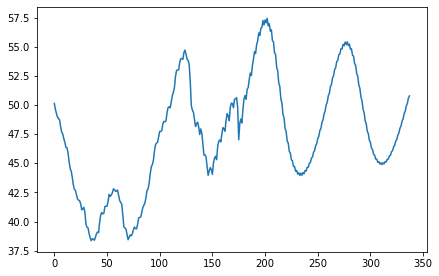

In [145]:
# Se representa conjuntamente los datos obtenidos tras la predicción junto con los datos reales de la serie.

plt.plot(result)
plt.show()